In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Overview
We want to take a brief understanding of the student engagement and how we can improve the current situation

### Summary:
1. Over half of the lessons are too difficult for students to finish in expected duration
2. We found out there is a large variation of engagement time for each of the lesson
3. The completion rate is quite low for the long expected duration lesson

### Recommendation
1. Try to segment or breakdown the course into different levels or difficulties matching with student's abilities
2. Set the lesson expected duration below 10 minutes to increase the completion rate

In [2]:
df_course = pd.read_csv('course_completion_data.csv')
df_feedback = pd.read_csv('feedback_data.csv')
df_engagement = pd.read_csv('student_engagement_data.csv')

In [3]:
df_course.head()

,LessonID,ExpectedDuration,CompletionRate
0,1,5.000000,1.000000
1,2,6.315789,0.868421
2,3,7.631579,0.736842
3,4,8.947368,0.605263
4,5,10.263158,0.500000


In [4]:
df_feedback.head()

,StudentID,LessonID,FeedbackScore,FeedbackComment
0,892,1,5.000000,Poor
1,92,2,5.000000,Average
2,973,3,3.341522,Good
3,680,4,2.966321,Average
4,214,5,1.188239,Average


In [5]:
df_engagement.head()

,StudentID,LessonID,SessionTime
0,685,12,8.382814
1,560,1,8.664799
2,630,5,81.987520
3,193,14,11.947281
4,836,10,31.066121


### To define a lesson is hard for the majority of the student, we find out the median of the lesson finish time whether it is larger than the expected duration

In [6]:
df_completion = df_engagement.groupby('LessonID').agg({'SessionTime': 'median'}).reset_index().merge(df_course, on='LessonID', how='left')

# For the median engagement time is larger than the expected duration, we will consider it as a hard lesson
df_completion.loc[df_completion['SessionTime'] > df_completion['ExpectedDuration'], 'hard_lesson'] = 'yes'
df_completion.loc[df_completion['SessionTime'] < df_completion['ExpectedDuration'], 'hard_lesson'] = 'no'
df_completion

,LessonID,SessionTime,ExpectedDuration,CompletionRate,hard_lesson
0,1,13.687286,5.000000,1.000000,yes
1,2,23.412963,6.315789,0.868421,yes
2,3,34.305114,7.631579,0.736842,yes
3,4,13.990557,8.947368,0.605263,yes
4,5,35.217321,10.263158,0.500000,yes
5,6,49.370934,11.578947,0.500000,yes
6,7,12.585773,12.894737,0.500000,no
7,8,12.036503,14.210526,0.500000,no
8,9,12.602791,15.526316,0.500000,no
9,10,14.139091,16.842105,0.500000,no


### Most of the course are too difficult for the student to finish within the expected duration

Text(0.5, 1.0, 'Number of hard lessons and normal lesson')

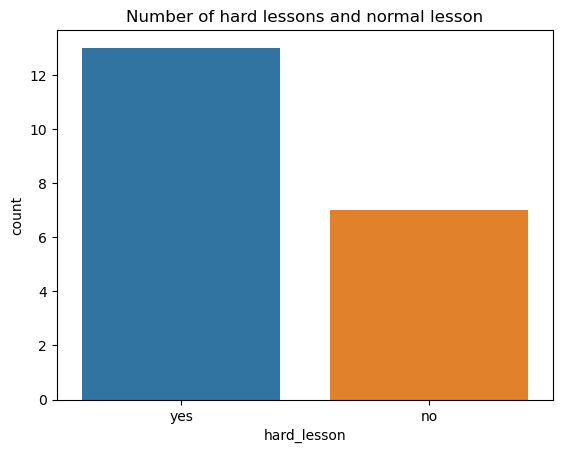

In [9]:
sns.countplot(data=df_completion, x='hard_lesson')
plt.title('Number of hard lessons and normal lesson')

### Each lesson engagement time also have a large variation, which also reflecting a large variation of the ability of student 

<Axes: xlabel='LessonID', ylabel='SessionTime'>

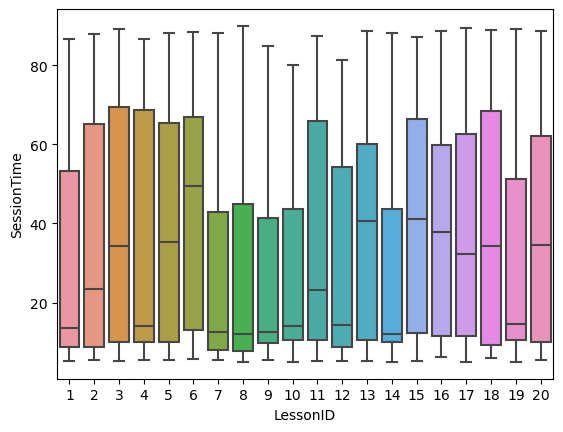

In [22]:
sns.boxplot(data=df_engagement, x='LessonID',y='SessionTime')

### Comparing the expected duration and completion rate, we can see the lesson completion rate started to increase when the expected duration is below 10 minutes

<Axes: xlabel='CompletionRate', ylabel='ExpectedDuration'>

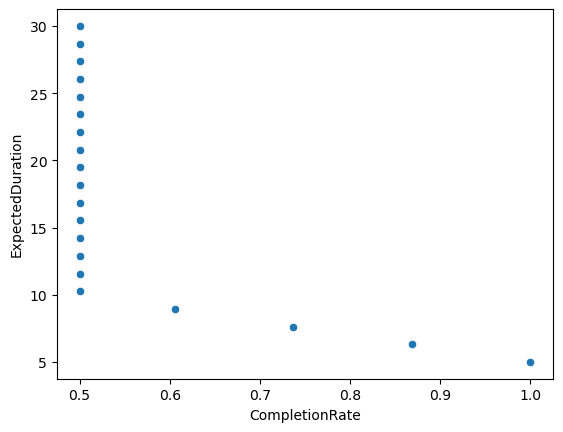

In [7]:
sns.scatterplot(data=df_course, x='CompletionRate', y='ExpectedDuration')